In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1=pd.read_csv("co2emisson.csv")
populationdf=pd.read_csv("Population.csv")
gdpdf=pd.read_csv("GDP.csv")



In [3]:
df4=df1.pivot(index='country_name',columns='year',values='value')
df5=pd.DataFrame({   
    'country_name':df1['country_name'],   
    'country_code':df1['country_code']   
    })
df5=df5.drop_duplicates()
df5.head()
co2df=df5.merge(df4,on='country_name',how='right')

In [4]:
populationdf=populationdf.rename(columns={'Country Name':'country_name','Country Code':'country_code'})
for columns in co2df.columns:
    co2df=co2df.rename(columns={columns:str(columns)})




In [5]:
df=pd.merge(populationdf,co2df,on=['country_code','country_name'],suffixes=('_pop','_co2'))

In [6]:
df.head()

,country_name,country_code,1960_pop,1961_pop,1962_pop,1963_pop,1964_pop,1965_pop,1966_pop,1967_pop,...,2010_co2,2011_co2,2012_co2,2013_co2,2014_co2,2015_co2,2016_co2,2017_co2,2018_co2,2019_co2
0,Aruba,ABW,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,57702.0,58044.0,...,2508.228000,2500.894000,1349.456000,861.745000,872.746000,898.415000,883.747000,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,152752671.0,156876454.0,...,529639.997445,521760.009862,543439.999305,565430.012964,587699.992426,574029.994987,578510.015696,587509.992346,590040.005282,603030.016154
2,Afghanistan,AFG,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,...,7110.000134,8930.000305,8079.999924,5989.999771,4880.000114,5949.999809,5300.000191,4780.000210,6070.000172,6079.999924
3,Africa Western and Central,AFW,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,109701811.0,112195950.0,...,165489.997715,171780.000016,177939.995751,193299.997561,201680.001885,198410.002500,206030.001298,204740.000457,211719.999298,220740.000024
4,Angola,AGO,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,5781305.0,5774440.0,...,22799.999237,23870.000839,23870.000839,26959.999084,29629.999161,31649.999619,29760.000229,24250.000000,23959.999084,25209.999084


In [7]:
for i in range(1960, 2019):
    df[f'{i}'] = df[f'{i}_co2']/df[f'{i}_pop']        

In [8]:
df_clean=df.dropna()
df_clean.head()


,country_name,country_code,1960_pop,1961_pop,1962_pop,1963_pop,1964_pop,1965_pop,1966_pop,1967_pop,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,Africa Eastern and Southern,AFE,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,152752671.0,156876454.0,...,0.000995,0.001022,0.000979,0.000993,0.001005,0.001017,0.000967,0.000948,0.000938,0.000918
2,Afghanistan,AFG,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,...,0.000172,0.000244,0.000297,0.000259,0.000186,0.000146,0.000173,0.000150,0.000132,0.000163
3,Africa Western and Central,AFW,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,109701811.0,112195950.0,...,0.000430,0.000472,0.000477,0.000481,0.000508,0.000516,0.000494,0.000499,0.000483,0.000486
4,Angola,AGO,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,5781305.0,5774440.0,...,0.000939,0.000976,0.000986,0.000951,0.001036,0.001100,0.001135,0.001032,0.000813,0.000778
5,Albania,ALB,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,...,0.001441,0.001528,0.001669,0.001503,0.001534,0.001668,0.001604,0.001558,0.001789,0.001783


In [9]:
for i in range(1960, 2019):
    df_clean[f'{i}'] = df_clean[f'{i}_co2']/df_clean[f'{i}_pop'] 
    mean=df_clean[f'{i}'].mean()
    std=df_clean[f'{i}'].std()
    df_clean[f'{i}_norm']=(df_clean[f'{i}']-mean)/std

/tmp/ipykernel_7260/442622669.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[f'{i}'] = df_clean[f'{i}_co2']/df_clean[f'{i}_pop']
/tmp/ipykernel_7260/442622669.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[f'{i}_norm']=(df_clean[f'{i}']-mean)/std
/tmp/ipykernel_7260/442622669.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [10]:
df_clean.head()

,country_name,country_code,1960_pop,1961_pop,1962_pop,1963_pop,1964_pop,1965_pop,1966_pop,1967_pop,...,2009_norm,2010_norm,2011_norm,2012_norm,2013_norm,2014_norm,2015_norm,2016_norm,2017_norm,2018_norm
1,Africa Eastern and Southern,AFE,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,152752671.0,156876454.0,...,-0.673716,-0.651994,-0.665753,-0.674941,-0.659362,-0.651130,-0.662813,-0.671216,-0.681192,-0.696148
2,Afghanistan,AFG,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,...,-0.830875,-0.807807,-0.804086,-0.823438,-0.828031,-0.832058,-0.830822,-0.842438,-0.856288,-0.863600
3,Africa Western and Central,AFW,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,109701811.0,112195950.0,...,-0.781535,-0.762048,-0.767564,-0.778623,-0.761652,-0.755205,-0.762837,-0.767481,-0.779962,-0.791851
4,Angola,AGO,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,5781305.0,5774440.0,...,-0.684281,-0.661080,-0.664503,-0.683430,-0.652926,-0.633850,-0.627154,-0.653334,-0.708258,-0.727194
5,Albania,ALB,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,...,-0.588386,-0.550632,-0.525956,-0.571540,-0.550553,-0.515667,-0.527933,-0.540593,-0.496404,-0.504047


In [11]:
for i in range(1960, 2022):
    # if f'{i}'in df_clean.columns :
    #     df_clean = df_clean.drop([ f'{i}'],axis=1) 
    if f'{i}_pop' in df_clean.columns :
        df_clean = df_clean.drop([ f'{i}_pop'],axis=1) 
    # if f'{i}_co2' in df_clean.columns :
    #     df_clean = df_clean.drop([ f'{i}_co2'],axis=1) 
df_clean.head()
    

,country_name,country_code,2020,2021,1960_co2,1961_co2,1962_co2,1963_co2,1964_co2,1965_co2,...,2009_norm,2010_norm,2011_norm,2012_norm,2013_norm,2014_norm,2015_norm,2016_norm,2017_norm,2018_norm
1,Africa Eastern and Southern,AFE,677243299.0,694665117.0,118545.901306,123758.90333,128093.897815,132810.33253,144345.352398,155803.780096,...,-0.673716,-0.651994,-0.665753,-0.674941,-0.659362,-0.651130,-0.662813,-0.671216,-0.681192,-0.696148
2,Afghanistan,AFG,38928341.0,39835428.0,414.371000,491.37800,689.396000,707.73100,839.743000,1008.425000,...,-0.830875,-0.807807,-0.804086,-0.823438,-0.828031,-0.832058,-0.830822,-0.842438,-0.856288,-0.863600
3,Africa Western and Central,AFW,458803476.0,470898870.0,8760.463000,9376.51900,9710.216000,11540.04900,13985.938000,19827.469000,...,-0.781535,-0.762048,-0.767564,-0.778623,-0.761652,-0.755205,-0.762837,-0.767481,-0.779962,-0.791851
4,Angola,AGO,32866268.0,33933611.0,550.050000,454.70800,1180.774000,1151.43800,1224.778000,1188.108000,...,-0.684281,-0.661080,-0.664503,-0.683430,-0.652926,-0.633850,-0.627154,-0.653334,-0.708258,-0.727194
5,Albania,ALB,2837849.0,2811666.0,2024.184000,2280.87400,2464.224000,2082.85600,2016.850000,2174.531000,...,-0.588386,-0.550632,-0.525956,-0.571540,-0.550553,-0.515667,-0.527933,-0.540593,-0.496404,-0.504047


In [12]:
df_clean['difference']=df_clean['2018_norm']-df_clean['1960_norm']
mean=df_clean['difference'].mean()
std=df_clean['difference'].std()
df_clean['difference_norm']=(df_clean['difference']-mean)/std
df_clean['sum']=df_clean.loc[:,'1960_norm':'2018_norm'].sum(axis=1)
mean=df_clean['sum'].mean()
std=df_clean['sum'].std()
df_clean['sum_norm']=(df_clean['sum']-mean)/std

/tmp/ipykernel_7260/332365329.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_clean['difference']=df_clean['2018_norm']-df_clean['1960_norm']
/tmp/ipykernel_7260/332365329.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_clean['difference_norm']=(df_clean['difference']-mean)/std
/tmp/ipykernel_7260/332365329.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=

<BarContainer object of 5 artists>

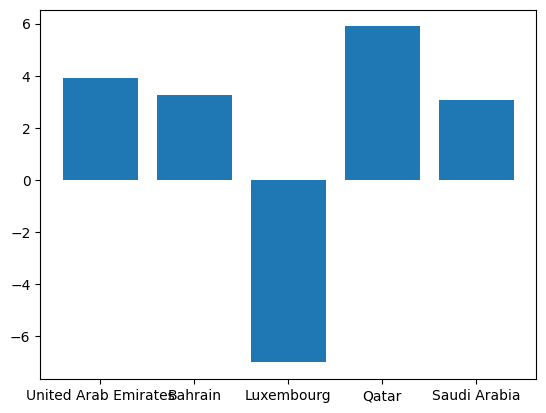

In [13]:
df_change=df_clean[['country_name','difference_norm','2018_norm','1960_norm','sum','sum_norm']]
df_change=df_change.drop(df_change[(df_change['difference_norm'] > -3) & (df_change['difference_norm'] < 3)].index)
plt.bar(df_change['country_name'],df_change['difference_norm'])


In [14]:
df_alldata=df_clean.loc[[i for i in df_change.index],['country_name']+[f'{i}_norm' for i in range(1960,2019)]]

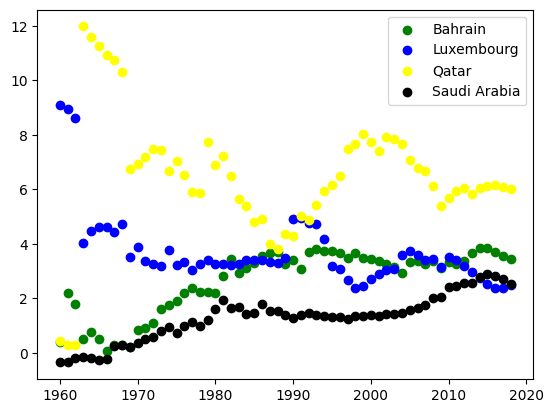

In [15]:
year=np.arange(1960,2019)
fig,ax=plt.subplots()
colors = ['red', 'green', 'blue', 'yellow', 'black']
for i in range(1,5):
    ax.scatter(year, df_alldata.iloc[i,1:], c=colors[i], label=df_alldata.iloc[i,0])
ax.legend()
plt.show()


In [16]:
df_change=df_clean[['country_name','difference_norm','2018_norm','1960_norm','sum','sum_norm']]
df_change=df_change.drop(df_change[(df_change['sum_norm'] > -3) & (df_change['sum_norm'] <3)].index)
df_change


,country_name,difference_norm,2018_norm,1960_norm,sum,sum_norm
8,United Arab Emirates,3.902243,3.183284,-0.492621,228.920728,4.201671
138,Luxembourg,-7.002041,2.503791,9.099700,219.687051,4.032194
190,Qatar,5.888751,5.997827,0.450635,382.594581,7.022242


In [17]:
df_change=df_clean[['country_name','difference_norm','2018_norm','1960_norm','sum','sum_norm']]
df_change=df_change.drop(df_change[(df_change['sum_norm'] > -3) & (df_change['sum_norm'] <3)].index)
df_change


,country_name,difference_norm,2018_norm,1960_norm,sum,sum_norm
8,United Arab Emirates,3.902243,3.183284,-0.492621,228.920728,4.201671
138,Luxembourg,-7.002041,2.503791,9.099700,219.687051,4.032194
190,Qatar,5.888751,5.997827,0.450635,382.594581,7.022242


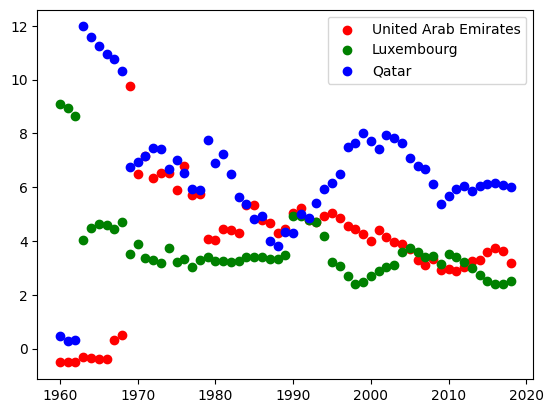

In [20]:
df_alldata=df_clean.loc[[i for i in df_change.index],['country_name']+[f'{i}_norm' for i in range(1960,2019)]]
year=np.arange(1960,2019)
fig,ax=plt.subplots()
colors = ['red', 'green', 'blue', 'yellow', 'black']
for i in range(len(df_alldata.index)):
    ax.scatter(year, df_alldata.iloc[i,1:], c=colors[i], label=df_alldata.iloc[i,0])
ax.legend()
plt.show()


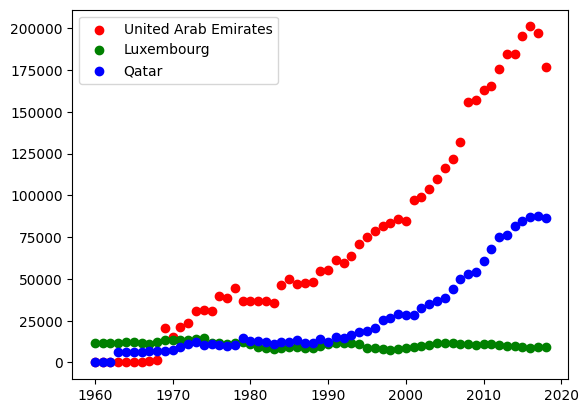

In [21]:
df_alldata=df_clean.loc[[i for i in df_change.index],['country_name']+[f'{i}_co2' for i in range(1960,2019)]]
year=np.arange(1960,2019)
fig,ax=plt.subplots()
colors = ['red', 'green', 'blue', 'yellow', 'black']
for i in range(len(df_alldata.index)):
    ax.scatter(year, df_alldata.iloc[i,1:], c=colors[i], label=df_alldata.iloc[i,0])
ax.legend()
plt.show()
